# Brain Tumor Detection
## ENEL 645 Final Project - Winter 2025

| Group \#: 6      |     |
| --------------   | --- |
| Student Names:   |     |
|Warisa Khaophong  |     |
|Frank Ma          |     |
|Cory Wu           |     |
|Rick Zhang        |     |

### Introduction

In this project, we will be using a U-Net model to . The dataset we will be using is the BraTS 2020 dataset, which contains over 28,000 images of brain tumors.

In [1]:
# Import necessary libraries and source code
import os
import sys
import torch
sys.path.append('./src')

from data_preprocessing import DataPreprocessor
from model import get_model
from train import train_model, BrainTumorDataset

In [4]:
# Data Preprocessing

# Set up paths
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, "data")
processed_dir = os.path.join(current_dir, "data", "processed_data")

# Initialize and run preprocessing
preprocessor = DataPreprocessor(data_dir, processed_dir)
splits = preprocessor.process_images()

# Print dataset statistics
for split_name, split_data in splits.items():
    print(f"\n{split_name} set:")
    healthy_count = sum(1 for x in split_data if x['label'] == 'healthy')
    tumor_count = sum(1 for x in split_data if x['label'] == 'tumor')
    print(f"Healthy: {healthy_count}, Tumor: {tumor_count}")

Saving test set: 100%|██████████| 581/581 [00:00<00:00, 2867.79it/s]


train set:
Healthy: 1190, Tumor: 1521

val set:
Healthy: 264, Tumor: 317

test set:
Healthy: 262, Tumor: 319


In [2]:
# Check computing resources

# Check GPU/MPS Availability (from check_gpu.py)
print("PyTorch version:", torch.__version__)
print("\nCUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA device count:", torch.cuda.device_count())
    print("Current CUDA device:", torch.cuda.current_device())
    print("CUDA device name:", torch.cuda.get_device_name(0))

print("\nMPS (Metal Performance Shaders) available:", torch.backends.mps.is_available())
if torch.backends.mps.is_available():
    print("MPS device name: Apple Silicon/AMD GPU")


PyTorch version: 2.6.0

CUDA available: False

MPS (Metal Performance Shaders) available: True
MPS device name: Apple Silicon/AMD GPU


In [3]:
# Set up paths for training
current_dir = os.getcwd()
processed_data_dir = os.path.join(current_dir, "data", "processed_data")
model_save_dir = os.path.join(current_dir, "data", "models", "checkpoints")

# Create model save directory if it doesn't exist
os.makedirs(model_save_dir, exist_ok=True)


In [4]:
# Initialize and train the model

batch_size = 8
epochs = 10

print(f"\nTraining Configuration:")
print(f"- Data directory: {processed_data_dir}")
print(f"- Model save directory: {model_save_dir}")
print(f"- Batch size: {batch_size}")
print(f"- Epochs: {epochs}\n")

# Start training
train_model(processed_data_dir, model_save_dir, batch_size=batch_size, epochs=epochs)


Training Configuration:
- Data directory: /Users/rzhang/Desktop/U of C/645 Final Project V2/data/processed_data
- Model save directory: /Users/rzhang/Desktop/U of C/645 Final Project V2/data/models/checkpoints
- Batch size: 8
- Epochs: 10


Training Setup:
- Using device: mps

Model Initialization:
- Using device: mps
- Model created

Checking parameter devices:
- enc1.0.weight: mps:0, torch.float32
- enc1.0.bias: mps:0, torch.float32
- enc1.1.weight: mps:0, torch.float32
- enc1.1.bias: mps:0, torch.float32
- enc1.3.weight: mps:0, torch.float32
- enc1.3.bias: mps:0, torch.float32
- enc1.4.weight: mps:0, torch.float32
- enc1.4.bias: mps:0, torch.float32
- enc2.0.weight: mps:0, torch.float32
- enc2.0.bias: mps:0, torch.float32
- enc2.1.weight: mps:0, torch.float32
- enc2.1.bias: mps:0, torch.float32
- enc2.3.weight: mps:0, torch.float32
- enc2.3.bias: mps:0, torch.float32
- enc2.4.weight: mps:0, torch.float32
- enc2.4.bias: mps:0, torch.float32
- enc3.0.weight: mps:0, torch.float32
- en

Epoch 1/10: 100%|██████████| 471/471 [11:14<00:00,  1.43s/it]



Epoch 1/10
Train Loss: 0.7186
Train Seg Loss: 0.6014
Train Class Loss: 0.2343
Train Seg Acc: 0.4364
Train Class Acc: 0.9116
Val Loss: 1.1422
Val Seg Loss: 0.5892
Val Class Loss: 1.1061
Val Seg Acc: 0.4422
Val Class Acc: 0.5691


Epoch 2/10: 100%|██████████| 471/471 [11:14<00:00,  1.43s/it]



Epoch 2/10
Train Loss: 0.6556
Train Seg Loss: 0.5742
Train Class Loss: 0.1628
Train Seg Acc: 0.4426
Train Class Acc: 0.9455
Val Loss: 0.6110
Val Seg Loss: 0.5679
Val Class Loss: 0.0863
Val Seg Acc: 0.4422
Val Class Acc: 0.9727


Epoch 3/10: 100%|██████████| 471/471 [11:14<00:00,  1.43s/it]



Epoch 3/10
Train Loss: 0.6259
Train Seg Loss: 0.5593
Train Class Loss: 0.1332
Train Seg Acc: 0.4426
Train Class Acc: 0.9589
Val Loss: 0.6227
Val Seg Loss: 0.5606
Val Class Loss: 0.1242
Val Seg Acc: 0.4422
Val Class Acc: 0.9608


Epoch 4/10: 100%|██████████| 471/471 [11:15<00:00,  1.43s/it]



Epoch 4/10
Train Loss: 0.6054
Train Seg Loss: 0.5513
Train Class Loss: 0.1081
Train Seg Acc: 0.4427
Train Class Acc: 0.9652
Val Loss: 0.5804
Val Seg Loss: 0.5490
Val Class Loss: 0.0627
Val Seg Acc: 0.4422
Val Class Acc: 0.9814


Epoch 5/10: 100%|██████████| 471/471 [11:18<00:00,  1.44s/it]



Epoch 5/10
Train Loss: 0.5963
Train Seg Loss: 0.5478
Train Class Loss: 0.0970
Train Seg Acc: 0.4428
Train Class Acc: 0.9695
Val Loss: 0.5997
Val Seg Loss: 0.5533
Val Class Loss: 0.0928
Val Seg Acc: 0.4422
Val Class Acc: 0.9801


Epoch 6/10: 100%|██████████| 471/471 [11:18<00:00,  1.44s/it]



Epoch 6/10
Train Loss: 0.6004
Train Seg Loss: 0.5413
Train Class Loss: 0.1183
Train Seg Acc: 0.4427
Train Class Acc: 0.9687
Val Loss: 0.5644
Val Seg Loss: 0.5450
Val Class Loss: 0.0388
Val Seg Acc: 0.4422
Val Class Acc: 0.9860


Epoch 7/10: 100%|██████████| 471/471 [11:19<00:00,  1.44s/it]



Epoch 7/10
Train Loss: 0.5881
Train Seg Loss: 0.5364
Train Class Loss: 0.1036
Train Seg Acc: 0.4426
Train Class Acc: 0.9737
Val Loss: 0.5446
Val Seg Loss: 0.5260
Val Class Loss: 0.0373
Val Seg Acc: 0.4422
Val Class Acc: 0.9854


Epoch 8/10: 100%|██████████| 471/471 [11:18<00:00,  1.44s/it]



Epoch 8/10
Train Loss: 0.5664
Train Seg Loss: 0.5257
Train Class Loss: 0.0813
Train Seg Acc: 0.4427
Train Class Acc: 0.9708
Val Loss: 0.5675
Val Seg Loss: 0.5289
Val Class Loss: 0.0774
Val Seg Acc: 0.4421
Val Class Acc: 0.9701


Epoch 9/10: 100%|██████████| 471/471 [11:18<00:00,  1.44s/it]



Epoch 9/10
Train Loss: 0.5584
Train Seg Loss: 0.5231
Train Class Loss: 0.0706
Train Seg Acc: 0.4428
Train Class Acc: 0.9764
Val Loss: 0.5475
Val Seg Loss: 0.5231
Val Class Loss: 0.0488
Val Seg Acc: 0.4421
Val Class Acc: 0.9794


Epoch 10/10: 100%|██████████| 471/471 [11:18<00:00,  1.44s/it]



Epoch 10/10
Train Loss: 0.5468
Train Seg Loss: 0.5171
Train Class Loss: 0.0593
Train Seg Acc: 0.4426
Train Class Acc: 0.9766
Val Loss: 0.5441
Val Seg Loss: 0.5110
Val Class Loss: 0.0662
Val Seg Acc: 0.4420
Val Class Acc: 0.9628


In [10]:
# Visualization
# Import visualization libraries

import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image
import os
from src.model import get_model

In [12]:
# Load the best model (you can choose which one to load)
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model = get_model(device)
model.load_state_dict(torch.load('data/models/checkpoints/best_model_class.pth'))
model.eval()


Model Initialization:
- Using device: mps
- Model created

Checking parameter devices:
- enc1.0.weight: mps:0, torch.float32
- enc1.0.bias: mps:0, torch.float32
- enc1.1.weight: mps:0, torch.float32
- enc1.1.bias: mps:0, torch.float32
- enc1.3.weight: mps:0, torch.float32
- enc1.3.bias: mps:0, torch.float32
- enc1.4.weight: mps:0, torch.float32
- enc1.4.bias: mps:0, torch.float32
- enc2.0.weight: mps:0, torch.float32
- enc2.0.bias: mps:0, torch.float32
- enc2.1.weight: mps:0, torch.float32
- enc2.1.bias: mps:0, torch.float32
- enc2.3.weight: mps:0, torch.float32
- enc2.3.bias: mps:0, torch.float32
- enc2.4.weight: mps:0, torch.float32
- enc2.4.bias: mps:0, torch.float32
- enc3.0.weight: mps:0, torch.float32
- enc3.0.bias: mps:0, torch.float32
- enc3.1.weight: mps:0, torch.float32
- enc3.1.bias: mps:0, torch.float32
- enc3.3.weight: mps:0, torch.float32
- enc3.3.bias: mps:0, torch.float32
- enc3.4.weight: mps:0, torch.float32
- enc3.4.bias: mps:0, torch.float32
- enc4.0.weight: mps:0, 

UNetWithClassification(
  (enc1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [13]:
# Cell 3: Function to visualize predictions
def visualize_predictions(test_dir, num_samples=5):
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Get paths for both healthy and tumor images
    healthy_dir = os.path.join(test_dir, 'healthy')
    tumor_dir = os.path.join(test_dir, 'tumor')
    
    healthy_images = os.listdir(healthy_dir)[:num_samples]
    tumor_images = os.listdir(tumor_dir)[:num_samples]
    
    # Function to process single image
    def process_image(image_path, true_label):
        img = Image.open(image_path).convert('RGB')
        img_tensor = transform(img).unsqueeze(0).to(device)
        
        with torch.no_grad():
            seg_map, class_prob = model(img_tensor)
        
        seg_map = seg_map.cpu().squeeze().numpy()
        class_prob = class_prob.cpu().squeeze().item()
        
        return img, seg_map, class_prob, true_label
 
     # Process both healthy and tumor images
    results = []
    
    # Process healthy images
    for img_name in healthy_images:
        if img_name.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(healthy_dir, img_name)
            results.append(process_image(img_path, "Healthy"))
    
    # Process tumor images
    for img_name in tumor_images:
        if img_name.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(tumor_dir, img_name)
            results.append(process_image(img_path, "Tumor"))
    
    # Visualization
    num_images = len(results)
    fig = plt.figure(figsize=(15, 4 * num_images))
    
    for idx, (img, seg_map, prob, true_label) in enumerate(results):
        # Original image
        ax1 = plt.subplot(num_images, 2, 2*idx + 1)
        ax1.imshow(img)
        ax1.set_title(f'Original Image\nTrue Label: {true_label}')
        ax1.axis('off')
    
     # Segmentation map
        ax2 = plt.subplot(num_images, 2, 2*idx + 2)
        seg_display = ax2.imshow(seg_map, cmap='jet', alpha=0.6)
        ax2.imshow(np.array(img.resize((256, 256))), alpha=0.4)
        ax2.set_title(f'Segmentation Map\nTumor Probability: {prob:.2%}')
        ax2.axis('off')
        plt.colorbar(seg_display, ax=ax2)
    
    plt.tight_layout()
    plt.show()
    
    # Print classification metrics
    print("\nClassification Results:")
    correct = 0
    for _, _, prob, true_label in results:
        predicted = "Tumor" if prob > 0.5 else "Healthy"
        correct += (predicted == true_label)
        print(f"True: {true_label:7} | Predicted: {predicted:7} | Probability: {prob:.2%}")
    
    print(f"\nAccuracy on shown samples: {correct/len(results):.2%}")


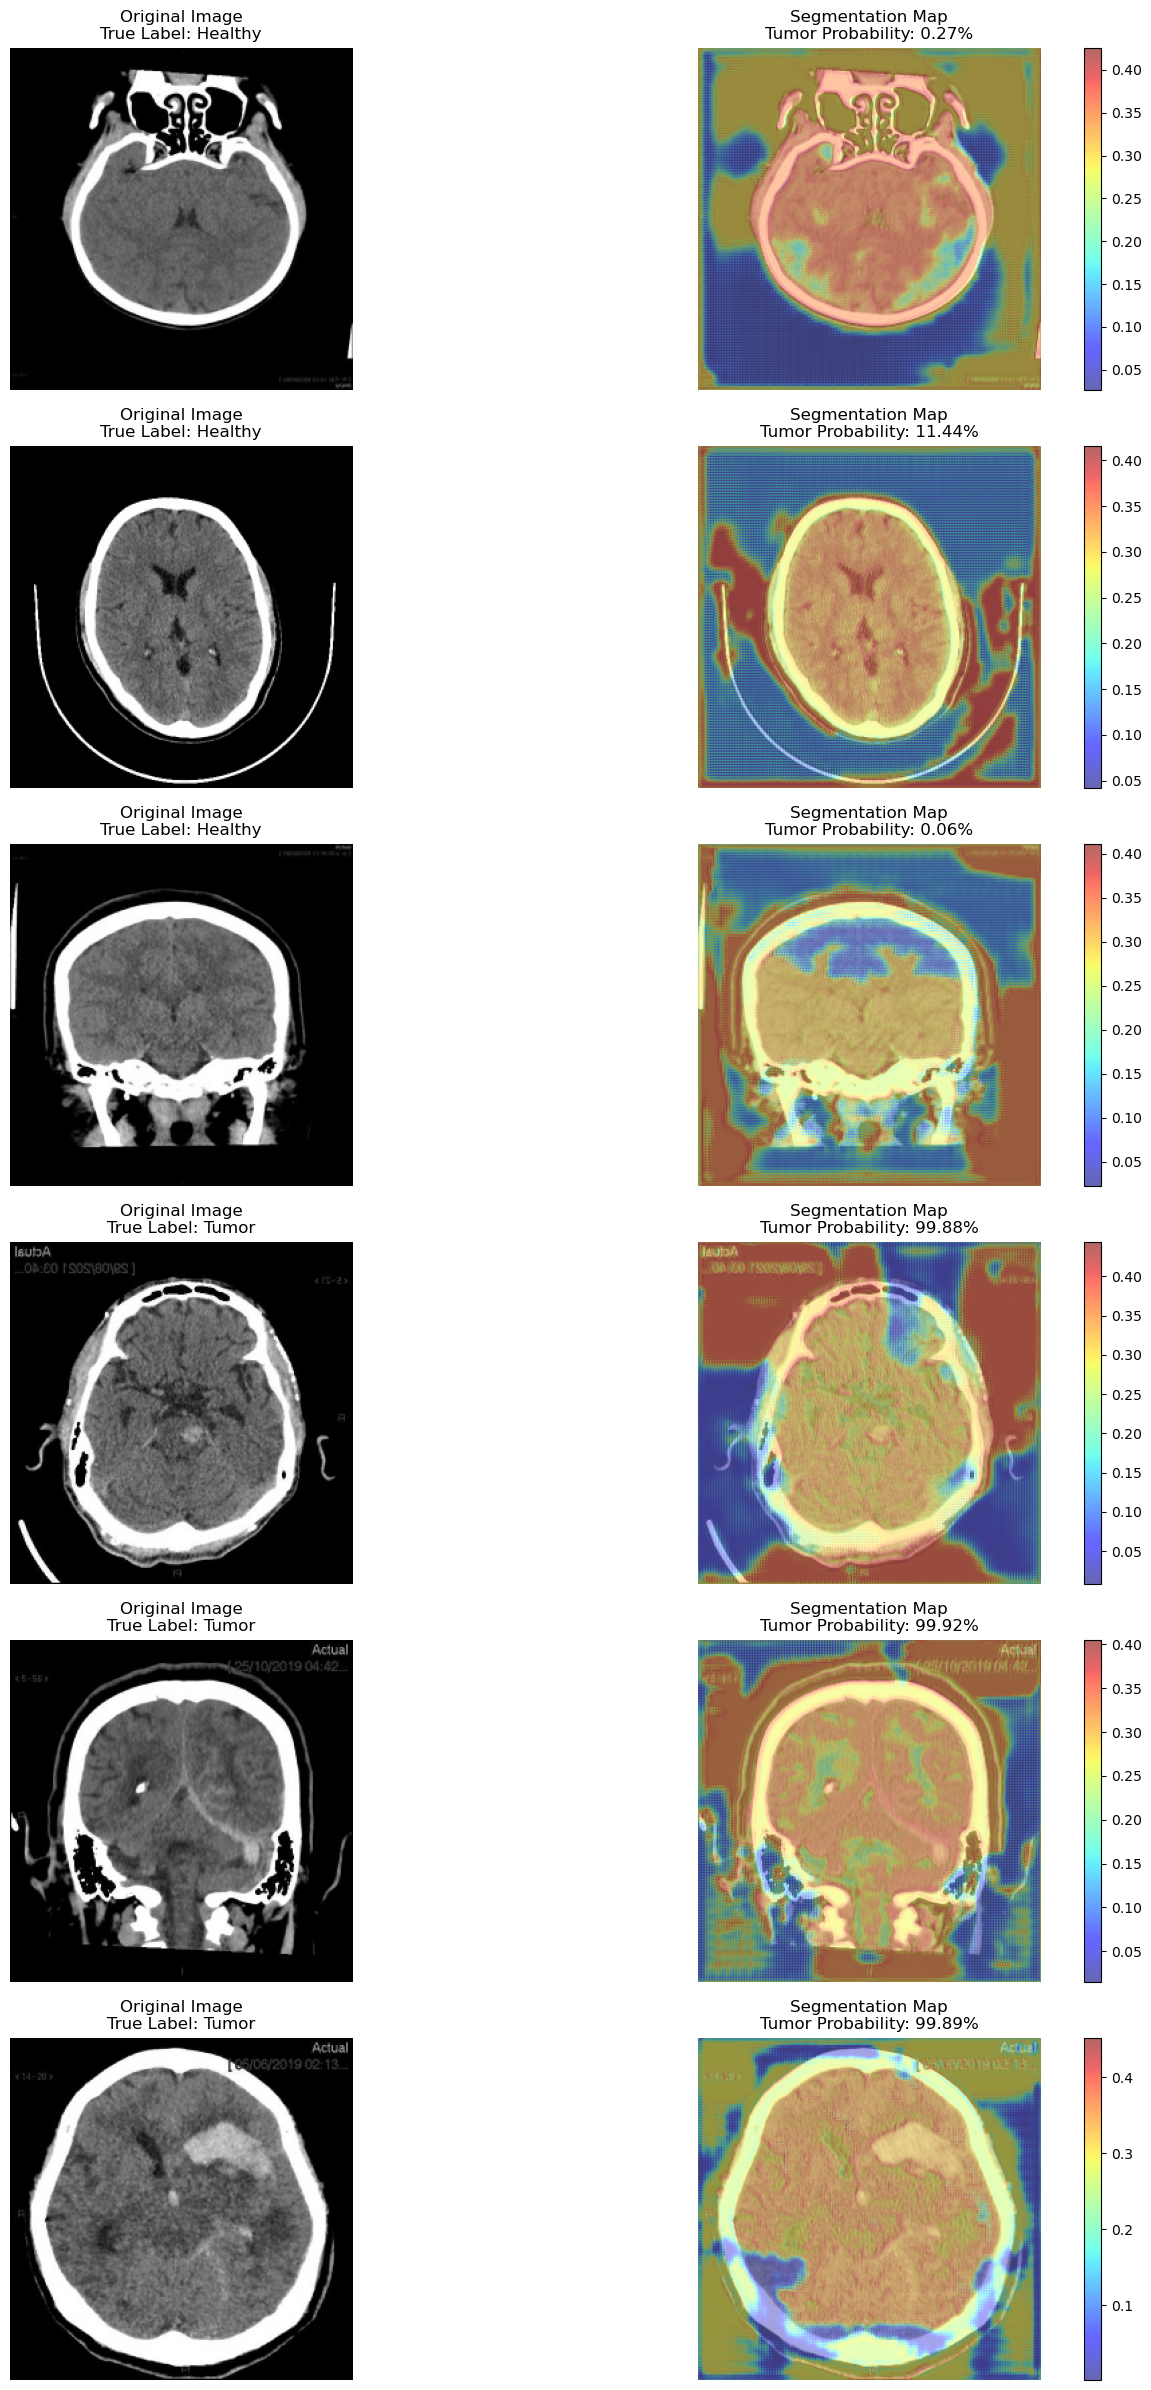


Classification Results:
True: Healthy | Predicted: Healthy | Probability: 0.27%
True: Healthy | Predicted: Healthy | Probability: 11.44%
True: Healthy | Predicted: Healthy | Probability: 0.06%
True: Tumor   | Predicted: Tumor   | Probability: 99.88%
True: Tumor   | Predicted: Tumor   | Probability: 99.92%
True: Tumor   | Predicted: Tumor   | Probability: 99.89%

Accuracy on shown samples: 100.00%


In [ ]:
# Example usage - visualize a sample image
test_dir = "data/processed_data/test"
visualize_predictions(test_dir, num_samples=3)

In [15]:
# Confusion Matrix
# Import additional libraries
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image
import os
from src.model import get_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [16]:
# Load the best model (same as before)
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model = get_model(device)
model.load_state_dict(torch.load('data/models/checkpoints/best_model_class.pth'))
model.eval()


Model Initialization:
- Using device: mps
- Model created

Checking parameter devices:
- enc1.0.weight: mps:0, torch.float32
- enc1.0.bias: mps:0, torch.float32
- enc1.1.weight: mps:0, torch.float32
- enc1.1.bias: mps:0, torch.float32
- enc1.3.weight: mps:0, torch.float32
- enc1.3.bias: mps:0, torch.float32
- enc1.4.weight: mps:0, torch.float32
- enc1.4.bias: mps:0, torch.float32
- enc2.0.weight: mps:0, torch.float32
- enc2.0.bias: mps:0, torch.float32
- enc2.1.weight: mps:0, torch.float32
- enc2.1.bias: mps:0, torch.float32
- enc2.3.weight: mps:0, torch.float32
- enc2.3.bias: mps:0, torch.float32
- enc2.4.weight: mps:0, torch.float32
- enc2.4.bias: mps:0, torch.float32
- enc3.0.weight: mps:0, torch.float32
- enc3.0.bias: mps:0, torch.float32
- enc3.1.weight: mps:0, torch.float32
- enc3.1.bias: mps:0, torch.float32
- enc3.3.weight: mps:0, torch.float32
- enc3.3.bias: mps:0, torch.float32
- enc3.4.weight: mps:0, torch.float32
- enc3.4.bias: mps:0, torch.float32
- enc4.0.weight: mps:0, 

UNetWithClassification(
  (enc1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [17]:
# Cell 3: Enhanced visualization function
def analyze_model_performance(test_dir, num_samples=None):
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Get all image paths
    healthy_dir = os.path.join(test_dir, 'healthy')
    tumor_dir = os.path.join(test_dir, 'tumor')
    
    healthy_images = [f for f in os.listdir(healthy_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    tumor_images = [f for f in os.listdir(tumor_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    if num_samples:
        healthy_images = healthy_images[:num_samples]
        tumor_images = tumor_images[:num_samples]
    
    results = []
    misclassified = []
    
    # Process images
    def process_images(image_list, directory, true_label):
        for img_name in image_list:
            img_path = os.path.join(directory, img_name)
            img = Image.open(img_path).convert('RGB')
            img_tensor = transform(img).unsqueeze(0).to(device)
            
            with torch.no_grad():
                seg_map, class_prob = model(img_tensor)
            
            seg_map = seg_map.cpu().squeeze().numpy()
            class_prob = class_prob.cpu().squeeze().item()
            predicted = "Tumor" if class_prob > 0.5 else "Healthy"
            
            result = {
                'image': img,
                'seg_map': seg_map,
                'probability': class_prob,
                'true_label': true_label,
                'predicted': predicted,
                'path': img_path
            }
            results.append(result)
            
            if predicted != true_label:
                misclassified.append(result)

    # Process both healthy and tumor images
    process_images(healthy_images, healthy_dir, "Healthy")
    process_images(tumor_images, tumor_dir, "Tumor")
    
    # Calculate confusion matrix
    y_true = [1 if r['true_label'] == "Tumor" else 0 for r in results]
    y_pred = [1 if r['predicted'] == "Tumor" else 0 for r in results]
    cm = confusion_matrix(y_true, y_pred)
    
    # Plotting
    fig = plt.figure(figsize=(20, 10))
    
    # 1. Confusion Matrix
    ax1 = plt.subplot(1, 2, 1)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Tumor"]).plot(ax=ax1)
    ax1.set_title("Confusion Matrix")
    
    # 2. Classification Metrics
    ax2 = plt.subplot(1, 2, 2)
    accuracy = sum(1 for r in results if r['true_label'] == r['predicted']) / len(results)
    healthy_acc = sum(1 for r in results if r['true_label'] == "Healthy" and r['predicted'] == "Healthy") / sum(1 for r in results if r['true_label'] == "Healthy")
    tumor_acc = sum(1 for r in results if r['true_label'] == "Tumor" and r['predicted'] == "Tumor") / sum(1 for r in results if r['true_label'] == "Tumor")

    metrics_text = f"""
    Overall Accuracy: {accuracy:.2%}
    Healthy Accuracy: {healthy_acc:.2%}
    Tumor Accuracy: {tumor_acc:.2%}
    Total Images: {len(results)}
    Misclassified: {len(misclassified)}
    """
    ax2.text(0.1, 0.5, metrics_text, fontsize=12, va='center')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

        # Show misclassified examples
    if misclassified:
        print("\nMisclassified Examples:")
        num_misc = min(len(misclassified), 3)  # Show up to 3 misclassified examples
        fig = plt.figure(figsize=(15, 4 * num_misc))
        
        for idx, result in enumerate(misclassified[:num_misc]):
            # Original image
            ax1 = plt.subplot(num_misc, 2, 2*idx + 1)
            ax1.imshow(result['image'])
            ax1.set_title(f'Original Image\nTrue: {result["true_label"]} | Predicted: {result["predicted"]}')
            ax1.axis('off')
            
            # Segmentation map
            ax2 = plt.subplot(num_misc, 2, 2*idx + 2)
            seg_display = ax2.imshow(result['seg_map'], cmap='jet', alpha=0.6)
            ax2.imshow(np.array(result['image'].resize((256, 256))), alpha=0.4)
            ax2.set_title(f'Segmentation Map\nTumor Probability: {result["probability"]:.2%}')
            ax2.axis('off')
            plt.colorbar(seg_display, ax=ax2)
        
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo misclassified examples found!")

  

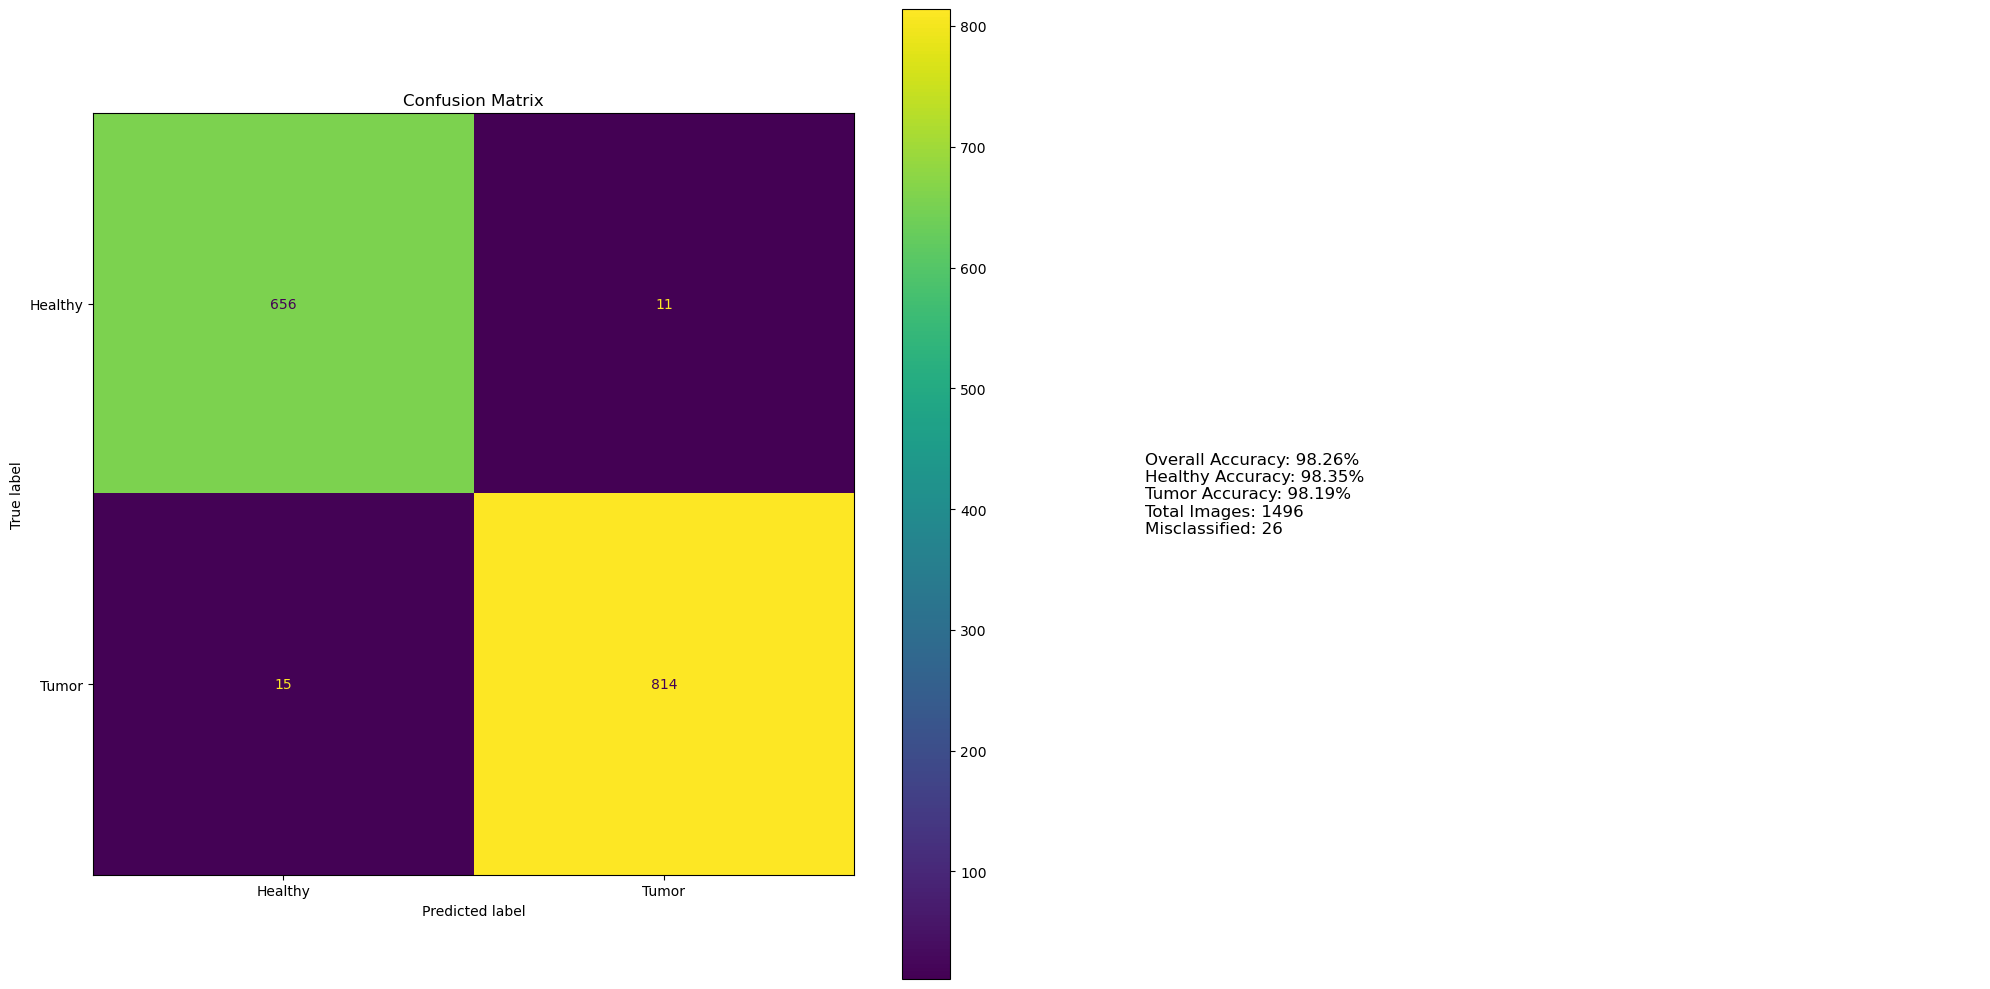


Misclassified Examples:


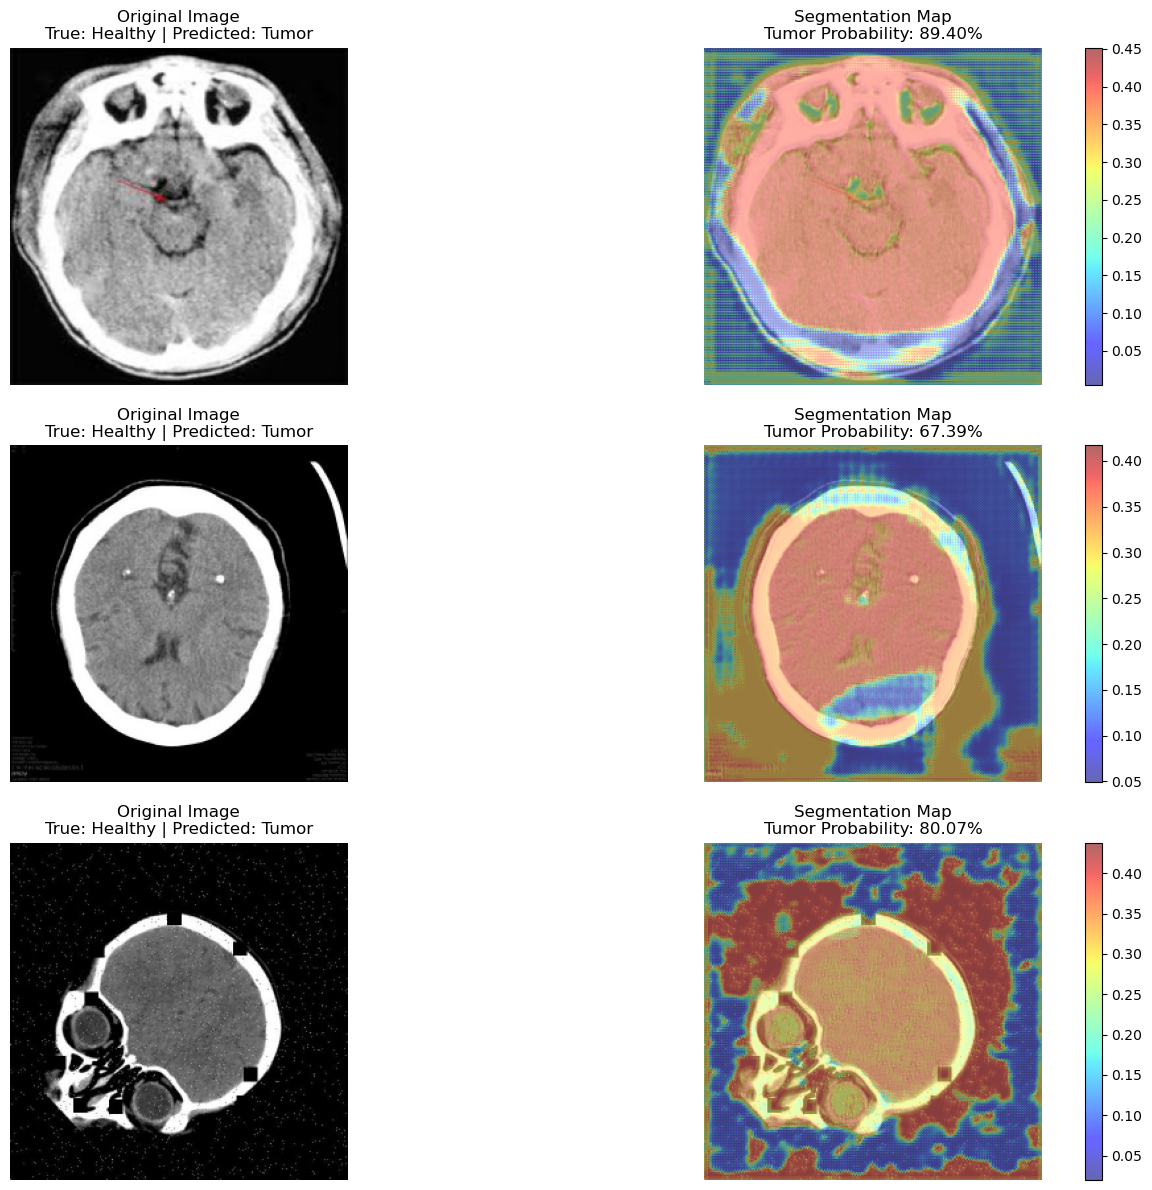

In [18]:
# Cell 4: Run the analysis
test_dir = "data/processed_data/test"
analyze_model_performance(test_dir, num_samples=None)  # Set to None to process all images

In [ ]:
# Import necessary libraries
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np